In [9]:
#Import packages

#Rdkit
from rdkit import Chem

#Scipy
from scipy import stats 
from scipy.stats import uniform,ranksums 

#Pandas
import pandas as pd
from pandas import DataFrame

#AlvaDesc
from alvadesccliwrapper.alvadesc import AlvaDesc

#Others
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import joblib 
import random
import numpy as np
import os
import math
import warnings

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import *

In [10]:
def print_RxC(dataframe):
    rows= dataframe.shape[0]
    columns= dataframe.shape[1]
    rows_columns=print(dataframe.shape[0],"Moleculars ×",dataframe.shape[1],"Descriptors")
    return rows_columns
def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr(method='spearman')
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_in[un_corr_idx]
    return df_out

In [11]:
#Set the Work Path
warnings.filterwarnings ('ignore')
#Work Path
os.chdir("C:/Users/A/Desktop/Paper_0_Hydrogel")
#AlvaDesc Path(Linux default alvaDescCLI location)
aDesc = AlvaDesc('E:\\C++\\alvaDesc\\alvaDescCLI.exe') 

In [12]:
#Read the data
Raw_data= pd.read_csv('./Original data/Raw_data.csv',index_col=0)
Raw_data['Gelability']=np.where(Raw_data['Gelability']=='Gelable', 1, 0)
Chemdraw_smiles=Raw_data['Chemdraw_smiles'].tolist()


In [13]:
Smis=[]
for i in Chemdraw_smiles:
    Smis.append(i)
Mols = []
for Smi in Smis:
    Mol = Chem.MolFromSmiles(Smi)
    Mols.append(Mol)
Canonical_smis = []
for Mol in Mols:
    Canonical_smi = Chem.MolToSmiles(Mol)
    Canonical_smis.append(Canonical_smi)
Raw_data['Canonical_smiles']=Canonical_smis
print_RxC(Raw_data)
Raw_data.head()

71 Moleculars × 3 Descriptors


,Gelability,Chemdraw_smiles,Canonical_smiles
ID,,,
Ma_2019_A,1,OC[C@@H]1[C@H]([C@H]([C@H](N2C=NC3=C(N=CN=C32)...,Nc1ncnc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O)[C@H]1O
Ma_2019_U,1,O[C@H]1[C@@H](O)[C@H](N(C(N2)=O)C=CC2=O)O[C@@H...,O=c1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O...
Ma_2019_C,1,O[C@H]1[C@@H](O)[C@H](N(C=CC(N)=N2)C2=O)O[C@@H...,Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1
Ma_2019_G,1,O=C1C2=C(N=C(N1)N)N([C@H]3[C@H](O)[C@@H]([C@H]...,Nc1nc2c(ncn2[C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)...
Ma_2019_dA,1,O[C@H]1C[C@H](N(C=N2)C3=C2C(N)=NC=N3)O[C@@H]1CO,Nc1ncnc2c1ncn2[C@H]1C[C@H](O)[C@@H](CO)O1


In [14]:
Raw_data.to_csv("./Original data/Smiles_data.csv",sep=',',header=1,index=1)

In [15]:
#Calculate the descriotors
aDesc.set_input_SMILES(Canonical_smis)
if not aDesc.calculate_descriptors('ALL'):
 print('Error: ' + aDesc.get_error())
else:
 Data_gelation=aDesc.get_output()


In [16]:
X_original_data=pd.DataFrame(Data_gelation)
Desc_names_names=aDesc.get_output_descriptors()
X_original_data.columns=Desc_names_names
X_original_data.index=Raw_data.index
print_RxC(X_original_data)
X_original_data.head()

71 Moleculars × 5666 Descriptors


,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,Mi,...,s1_numAroBonds,s2_numAroBonds,s3_numAroBonds,s4_numAroBonds,s34_size,s34_relSize,s34_phSize,s34_phRelSize,chiralMoment,chiralPhMoment
ID,,,,,,,,,,,,,,,,,,,,,
Ma_2019_A,267.28,8.352500,20.0734,33.3526,19.8921,36.9899,0.627294,1.042269,0.621628,1.155934,...,0.0,0.0,0.0,10.0,16.0,0.842105,7.75,0.407895,17.966397,8.618182
Ma_2019_U,244.23,8.421724,17.9656,30.5854,17.5454,33.3290,0.619503,1.054669,0.605014,1.149276,...,0.0,0.0,0.0,0.0,14.0,0.823529,6.75,0.397059,14.808251,7.026700
Ma_2019_C,243.25,8.108333,18.2722,31.3599,18.0966,34.6179,0.609073,1.045330,0.603220,1.153930,...,0.0,0.0,0.0,0.0,14.0,0.823529,6.75,0.397059,14.808251,7.026700
Ma_2019_G,283.28,8.584242,20.7882,34.6799,20.3466,38.1993,0.629945,1.050906,0.616564,1.157555,...,0.0,0.0,0.0,5.0,17.0,0.850000,8.75,0.437500,19.586399,10.257197
Ma_2019_dA,251.28,8.105806,19.3586,32.0253,19.4376,35.7805,0.624471,1.033074,0.627019,1.154210,...,0.0,0.0,0.0,10.0,15.0,0.833333,7.00,0.388889,17.259745,8.115820


In [17]:
#Remove descriptors with excessive NA values
Thresh =int(0.8*len(X_original_data))
X_NAomit_data=X_original_data.dropna(
    #thresh=Thresh, 
    axis=1) 
print_RxC(X_NAomit_data)
X_NAomit_data.head()
X_NAomit_data.to_csv("./Original data/X_NAomit_data.csv",sep=',',header=1,index=1)

71 Moleculars × 4175 Descriptors


In [18]:
#Ranksum test
Ranksums_data=X_NAomit_data
Ranksums_data["Gelability"]=Raw_data['Gelability']
Notgelable=Ranksums_data.loc[Ranksums_data["Gelability"] == 0]
Gelable=Ranksums_data.loc[Ranksums_data["Gelability"] == 1]
Ranksums_result=[]
for i in list(Ranksums_data.columns):
 NG = Notgelable[i]
 G = Gelable[i]
 Ranksums_caculate=ranksums(NG, G, alternative='two-sided', nan_policy='omit')
 Ranksums_result.append(Ranksums_caculate)
Ranksums_results = pd.DataFrame(Ranksums_result, columns=['Statistics','Pvalues'])
Ranksums_results.index=Ranksums_data.columns#
Ranksums_results = Ranksums_results.drop('Gelability',axis = 0)
Ranksums_results.sort_values(by="Pvalues" , inplace=True, ascending=True)
Ranksums_results.head()

,Statistics,Pvalues
MATS3p,3.758315,0.000171
MATS3v,3.677615,0.000235
SM10_AEA(dm),3.608444,0.000308
Eig01_EA(ed),3.608444,0.000308
SpMax_EA(ed),3.608444,0.000308


In [19]:
#Ranksum test <0.05
Ranksums_marked = Ranksums_results[Ranksums_results['Pvalues'] <0.05]
print(Ranksums_marked.shape)
Ranksums_marked.head()

(144, 2)


,Statistics,Pvalues
MATS3p,3.758315,0.000171
MATS3v,3.677615,0.000235
SM10_AEA(dm),3.608444,0.000308
Eig01_EA(ed),3.608444,0.000308
SpMax_EA(ed),3.608444,0.000308


In [20]:
X_ranksums_data=X_NAomit_data[Ranksums_marked.index]
print_RxC(X_ranksums_data)
X_ranksums_data.head()

71 Moleculars × 144 Descriptors


,MATS3p,MATS3v,SM10_AEA(dm),Eig01_EA(ed),SpMax_EA(ed),GATS3v,GATS7s,F07[N-O],SM12_EA(ed),SM09_EA(ed),...,minaaN,nLevel6,s2_pathLength,SpMAD_B(p),SpMAD_A,SM15_EA(ri),GNar,SM03_EA(ed),X0A,GATS8i
ID,,,,,,,,,,,,,,,,,,,,,
Ma_2019_A,-0.085445,-0.073032,11.607041,11.607041,11.607041,1.022785,0.962089,4.0,29.609609,22.312589,...,3.810499,1.500000,1.500000,1.492166,1.296386,16.951973,2.050213,7.548029,0.714134,0.981436
Ma_2019_U,-0.087509,-0.063423,11.152723,11.152723,11.152723,1.016541,1.131327,1.0,29.014596,21.800414,...,0.000000,0.750000,1.500000,1.439809,1.248566,16.540255,1.927525,7.264730,0.739823,0.587369
Ma_2019_C,-0.100433,-0.070546,11.152723,11.152723,11.152723,1.031143,1.023020,2.0,29.014596,21.800414,...,0.000000,0.750000,1.500000,1.429846,1.248566,16.497968,1.927525,7.264730,0.739823,0.913354
Ma_2019_G,-0.047845,-0.041945,11.639705,11.639705,11.639705,0.983313,0.940430,4.0,29.649090,22.344302,...,3.880152,1.750000,1.500000,1.461212,1.269881,17.118899,2.018429,7.603399,0.721940,0.995781
Ma_2019_dA,-0.061137,-0.051132,11.234674,11.234674,11.234674,1.008666,1.124941,2.0,29.134103,21.926368,...,3.853973,1.333333,1.666667,1.500617,1.304420,16.620737,2.086115,7.368340,0.705461,1.029772


In [21]:
#Scale data
Scaler = preprocessing.MinMaxScaler() #StandardScaler
Transformer =Scaler.fit(X_ranksums_data)
X_scaled_data=Transformer.transform(X_ranksums_data)
X_scaled_data =pd.DataFrame(X_scaled_data)
X_scaled_data.columns=X_ranksums_data.columns
X_scaled_data.index=Raw_data.index
X_scaled_data.to_csv("./Original data/X_scaled_data.csv",sep=',',header=1,index=1)
joblib.dump(Transformer, './Models/Scaler_transformer.pkl')
print_RxC(X_scaled_data)
X_scaled_data.head()

71 Moleculars × 144 Descriptors


,MATS3p,MATS3v,SM10_AEA(dm),Eig01_EA(ed),SpMax_EA(ed),GATS3v,GATS7s,F07[N-O],SM12_EA(ed),SM09_EA(ed),...,minaaN,nLevel6,s2_pathLength,SpMAD_B(p),SpMAD_A,SM15_EA(ri),GNar,SM03_EA(ed),X0A,GATS8i
ID,,,,,,,,,,,,,,,,,,,,,
Ma_2019_A,0.223067,0.344851,0.382490,0.382490,0.382490,0.689326,0.390779,0.500000,0.464641,0.497602,...,0.919692,0.363636,0.090909,0.674747,0.722310,0.523719,0.585611,0.552864,0.442403,0.586479
Ma_2019_U,0.218409,0.381663,0.270850,0.270850,0.270850,0.671199,0.589845,0.000000,0.317977,0.329816,...,0.000000,0.090909,0.090909,0.373885,0.326999,0.367153,0.174645,0.336752,0.830666,0.000000
Ma_2019_C,0.189242,0.354375,0.270850,0.270850,0.270850,0.713595,0.462449,0.166667,0.317977,0.329816,...,0.000000,0.090909,0.090909,0.316630,0.326999,0.351072,0.174645,0.336752,0.830666,0.485155
Ma_2019_G,0.307924,0.463942,0.390516,0.390516,0.390516,0.574721,0.365302,0.500000,0.474373,0.507991,...,0.936503,0.454545,0.090909,0.496875,0.503205,0.587196,0.479147,0.595103,0.560377,0.607829
Ma_2019_dA,0.277926,0.428750,0.290988,0.290988,0.290988,0.648332,0.582334,0.166667,0.347434,0.371078,...,0.930185,0.303030,0.151515,0.723311,0.788722,0.397757,0.705872,0.415790,0.311320,0.658417


In [22]:
#Remove high correlation descriptors
X_cor_data=trimm_correlated(X_scaled_data,0.80)
X_cor_data.index=Raw_data.index
X_cor_data.to_csv("./Original data/ML_data.csv",sep=',',header=1,index=1)
print_RxC(X_cor_data)
X_cor_data.head()

71 Moleculars × 40 Descriptors


,MATS3p,SM10_AEA(dm),GATS7s,F07[N-O],VE1sign_Dz(v),VE3sign_D/Dt,P_VSA_charge_4,CATS2D_09_DA,B09[O-O],CATS2D_06_DL,...,MATS2m,MATS2p,GATS6i,P_VSA_charge_2,Eig03_AEA(ed),CATS2D_05_DA,GATS2p,C-016,s2_pathLength,GATS8i
ID,,,,,,,,,,,,,,,,,,,,,
Ma_2019_A,0.223067,0.382490,0.390779,0.500000,0.339202,0.433674,0.000000,0.4,0.0,0.00,...,0.136148,0.791478,0.070041,0.015761,0.580423,0.500000,0.304895,0.0,0.090909,0.586479
Ma_2019_U,0.218409,0.270850,0.589845,0.000000,0.097243,0.770077,0.000000,0.2,1.0,0.25,...,0.028067,0.316380,0.138782,0.384100,0.200950,0.500000,0.711020,1.0,0.090909,0.000000
Ma_2019_C,0.189242,0.270850,0.462449,0.166667,0.081578,0.770077,0.359389,0.2,0.0,0.25,...,0.157809,0.441757,0.327739,0.025930,0.200950,0.500000,0.667729,1.0,0.090909,0.485155
Ma_2019_G,0.307924,0.390516,0.365302,0.500000,0.259153,0.508232,0.359389,0.6,1.0,0.00,...,0.224020,0.631157,0.262950,0.373931,0.587700,0.666667,0.484050,0.0,0.090909,0.607829
Ma_2019_dA,0.277926,0.290988,0.582334,0.166667,0.404032,0.457316,0.000000,0.4,0.0,0.25,...,0.230461,0.794139,0.231586,0.015761,0.536421,0.000000,0.242784,0.0,0.151515,0.658417


In [23]:
Pubchem_data=pd.read_csv("./Original data/Pubchem_data.csv",sep=',')
Iso_smiles=Pubchem_data['Iso_smiles']
print_RxC(Pubchem_data)
Pubchem_data.head()

11406 Moleculars × 3 Descriptors


,cid,Iso_smiles,Type
0,5273,C1CC(OC1)[N+]2=CNC3=C(N=CN=C32)N,Adenosine
1,13463,C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)CCl)O)O)N,Adenosine
2,39148,CN(C)C1[C@H](O[C@H](C1O)N2C=NC3=C(N=CN=C32)N)CO,Adenosine
3,56328,C1[C@H](O[C@H](C1F)N2C=NC3=C(N=CN=C32)N)CO,Adenosine
4,67358,C1=NC(=C2C(=N1)N(C=[N+]2[O-])[C@H]3[C@@H]([C@@...,Adenosine


In [24]:
Smis=[]
for i in Iso_smiles:
    Smis.append(i)
Mols = []
for Smi in Smis:
    Mol = Chem.MolFromSmiles(Smi)
    Mols.append(Mol)
Canonical_smis = []
for Mol in Mols:
    Canonical_smi = Chem.MolToSmiles(Mol)
    Canonical_smis.append(Canonical_smi)
Pubchem_data['Canonical_smiles']=Canonical_smis

In [25]:
Pubchem_data=Pubchem_data.drop_duplicates(subset="cid")
Pubchem_data=Pubchem_data.drop_duplicates(subset="Canonical_smiles")
Pubchem_data=Pubchem_data[~ Pubchem_data['Canonical_smiles'].isin(Raw_data['Canonical_smiles'])]
Pubchem_data.index=Pubchem_data['cid']
Pubchem_data.drop('cid',axis = 1,inplace = True)
print_RxC(Pubchem_data)
Pubchem_data.head()

7260 Moleculars × 3 Descriptors


,Iso_smiles,Type,Canonical_smiles
cid,,,
5273,C1CC(OC1)[N+]2=CNC3=C(N=CN=C32)N,Adenosine,Nc1ncnc2c1[nH]c[n+]2C1CCCO1
13463,C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)CCl)O)O)N,Adenosine,Nc1ncnc2c1ncn2C1OC(CCl)C(O)C1O
39148,CN(C)C1[C@H](O[C@H](C1O)N2C=NC3=C(N=CN=C32)N)CO,Adenosine,CN(C)C1C(O)[C@H](n2cnc3c(N)ncnc32)O[C@@H]1CO
56328,C1[C@H](O[C@H](C1F)N2C=NC3=C(N=CN=C32)N)CO,Adenosine,Nc1ncnc2c1ncn2[C@@H]1O[C@H](CO)CC1F
67358,C1=NC(=C2C(=N1)N(C=[N+]2[O-])[C@H]3[C@@H]([C@@...,Adenosine,Nc1ncnc2c1[n+]([O-])cn2[C@@H]1O[C@H](CO)[C@@H]...


In [26]:
aDesc.set_input_SMILES(Pubchem_data['Canonical_smiles'].tolist())
if not aDesc.calculate_descriptors(X_scaled_data.columns.tolist()):
 print('Error:' + aDesc.get_error())
else:
 X_test=pd.DataFrame(aDesc.get_output())
X_test.columns=X_scaled_data.columns
X_test.index=Pubchem_data.index
X_test=X_test.dropna(axis=0,how='any')
print_RxC(X_test)
X_test.head()

7257 Moleculars × 144 Descriptors


,MATS3p,MATS3v,SM10_AEA(dm),Eig01_EA(ed),SpMax_EA(ed),GATS3v,GATS7s,F07[N-O],SM12_EA(ed),SM09_EA(ed),...,minaaN,nLevel6,s2_pathLength,SpMAD_B(p),SpMAD_A,SM15_EA(ri),GNar,SM03_EA(ed),X0A,GATS8i
cid,,,,,,,,,,,,,,,,,,,,,
5273,-0.118664,-0.058679,11.188448,11.188448,11.188448,1.019144,1.426707,0.0,29.020239,21.785780,...,3.928533,0.000000,2.000000,1.535243,1.332879,16.409915,2.186042,7.110696,0.683381,0.429598
13463,-0.110019,-0.104518,11.607041,11.607041,11.607041,1.012946,0.945439,2.0,29.609609,22.312589,...,3.829388,1.500000,1.500000,1.490869,1.296386,16.935488,2.050213,7.548029,0.714134,0.961675
39148,-0.147753,-0.148145,11.852001,11.852001,11.852001,1.144038,0.840440,4.0,29.936267,22.584873,...,3.879882,1.500000,2.000000,1.463070,1.272769,17.200267,2.017548,7.689371,0.721233,0.743204
56328,-0.030999,-0.050012,11.427769,11.427769,11.427769,0.997521,1.053703,2.0,29.330533,22.061832,...,3.813682,1.333333,1.333333,1.504888,1.304852,16.634942,2.086115,7.379632,0.705461,0.899745
67358,-0.094554,-0.067810,11.970594,11.970594,11.970594,1.023463,1.121252,4.0,29.981979,22.597242,...,3.712999,2.000000,1.500000,1.473359,1.278174,17.229851,2.018429,7.667158,0.721940,0.902616


In [27]:
X_test_scaled=Transformer.transform(X_test)
X_test_scaled =pd.DataFrame(X_test_scaled)
X_test_scaled.columns=X_test.columns
X_test_scaled.index=X_test.index
X_test_scaled

,MATS3p,MATS3v,SM10_AEA(dm),Eig01_EA(ed),SpMax_EA(ed),GATS3v,GATS7s,F07[N-O],SM12_EA(ed),SM09_EA(ed),...,minaaN,nLevel6,s2_pathLength,SpMAD_B(p),SpMAD_A,SM15_EA(ri),GNar,SM03_EA(ed),X0A,GATS8i
cid,,,,,,,,,,,,,,,,,,,,,
5273,0.148099,0.399835,0.279629,0.279629,0.279629,0.678756,0.937287,-0.166667,0.319368,0.325022,...,0.948180,-0.181818,0.272727,0.922290,1.023979,0.317587,1.040594,0.219248,-0.022413,-0.234805
13463,0.167609,0.224229,0.382490,0.382490,0.382490,0.660760,0.371194,0.166667,0.464641,0.497602,...,0.924251,0.363636,0.090909,0.667298,0.722310,0.517450,0.585611,0.552864,0.442403,0.557069
39148,0.082452,0.057093,0.442684,0.442684,0.442684,1.041388,0.247689,0.500000,0.545159,0.586801,...,0.936438,0.363636,0.272727,0.507550,0.527074,0.618139,0.476195,0.660686,0.549701,0.231925
56328,0.345941,0.433041,0.338437,0.338437,0.338437,0.615972,0.498540,0.166667,0.395852,0.415455,...,0.920460,0.303030,0.030303,0.747859,0.792291,0.403159,0.705872,0.424404,0.311320,0.464901
67358,0.202511,0.364857,0.471826,0.471826,0.471826,0.691296,0.577994,0.500000,0.556426,0.590853,...,0.896160,0.545455,0.090909,0.566675,0.571759,0.629389,0.479147,0.643741,0.560377,0.469174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121487078,0.307298,0.502618,0.061328,0.061328,0.061328,0.689286,0.884477,0.166667,0.104008,0.129713,...,0.000000,0.181818,0.757576,0.685187,0.409874,0.257604,0.298668,0.196494,0.648842,0.485290
121487098,0.327148,0.424913,0.470093,0.470093,0.470093,0.668225,0.652683,0.500000,0.519672,0.531393,...,0.000000,0.090909,0.454545,0.745547,0.596611,0.512102,0.569412,0.528346,0.432287,-0.102473
121487432,-0.084868,0.107384,0.738226,0.738226,0.738226,1.036075,0.415882,0.000000,0.784272,0.805473,...,0.000000,0.272727,0.272727,0.134348,-0.156473,0.721200,-0.076508,0.868444,1.126440,1.174134


In [28]:
X_test_scaled.to_csv("./Original data/X_test_data.csv",sep=',',header=1,index=1)

In [ ]:
#Final arrangement

In [226]:
Pubchem_data=Pubchem_data.loc[X_test_scaled.index.to_list()]
aDesc.set_input_SMILES(Pubchem_data['Canonical_smiles'].tolist())
if not aDesc.calculate_descriptors(['ALOGP','MLOGP','LOGP99','LOGPcons','ESOL','Hy','TPSA(NO)','TPSA(Tot)']):
 print('Error:' + aDesc.get_error())
else:
 Pubchem_descriptors=aDesc.get_output()

In [227]:
Predicted_data=pd.read_csv("./Results/LR_predict_data.csv",sep=',',index_col=0)
Predicted_data

,Probability of not gelable,Probability of gelable
cid,,
445132,0.316696,0.683304
92252368,0.319758,0.680242
21826754,0.319758,0.680242
131876227,0.323628,0.676372
293725,0.340278,0.659722
...,...,...
71832128,0.736183,0.263817
42553032,0.736183,0.263817
42553033,0.736183,0.263817


In [228]:
Pubchem_descriptor=pd.DataFrame(Pubchem_descriptors)
Pubchem_descriptor.columns=['ALOGP','MLOGP','LOGP99','LOGPcons','ESOL','Hy','TPSA(NO)','TPSA(Tot)']
Pubchem_descriptor.index=X_test_scaled.index

In [229]:
Pubchem_all_data=pd.concat([Pubchem_descriptor,Predicted_data['Probability of gelable']],axis=1)
Pubchem_all_data=Pubchem_all_data.sort_values('Probability of gelable', ascending=False)
Pubchem_gel_data=Pubchem_all_data.iloc[range(0,int(len(Pubchem_all_data)*0.1)),]
Pubchem_gel_data=Pubchem_gel_data.drop(['Probability of gelable'],axis=1)
Pubchem_gel_data.index.names=['ID']
Pubchem_gel_data['Gelability']="Top 10%"
Pubchem_gel_data

,ALOGP,MLOGP,LOGP99,LOGPcons,ESOL,Hy,TPSA(NO),TPSA(Tot),Gelability
ID,,,,,,,,,
445132,-3.2962,-2.276331,-2.9891,-2.853877,0.285331,3.047842,182.93,192.74,Top 10%
92252368,-2.0988,-1.882651,-2.7198,-2.233750,0.128903,3.244100,157.64,157.64,Top 10%
21826754,-2.0988,-1.882651,-2.7198,-2.233750,0.128903,3.244100,157.64,157.64,Top 10%
131876227,-1.8929,-1.565443,-2.3776,-1.945314,-0.155452,2.245000,146.78,146.78,Top 10%
293725,-1.5960,-0.654957,-1.2234,-1.158119,-0.646246,1.296520,132.51,132.51,Top 10%
...,...,...,...,...,...,...,...,...,...
453467,-1.5273,-0.529896,-1.1234,-1.060198,-0.565902,2.235747,110.34,110.34,Top 10%
10922698,-1.5273,-0.529896,-1.1234,-1.060198,-0.565902,2.235747,110.34,110.34,Top 10%
6573798,-1.5273,-0.529896,-1.1234,-1.060198,-0.565902,2.235747,110.34,110.34,Top 10%


In [250]:
aDesc.set_input_SMILES(Raw_data['Canonical_smiles'].tolist())
if not aDesc.calculate_descriptors(['ALOGP','ESOL','Hy','TPSA(Tot)']):
 print('Error:' + aDesc.get_error())
else:
 Raw_descriptors=aDesc.get_output()

In [251]:
Raw_descriptor=pd.DataFrame( Raw_descriptors)
Raw_descriptor.columns=['ALOGP','ESOL','Hy','TPSA(Tot)']
Raw_descriptor.index=Raw_data.index
Raw_descriptor['Gelability']=Raw_data['Gelability']
Raw_descriptor
Scaler_data=Raw_descriptor.drop(['Gelability'],axis=1)
Scaler_data

,ALOGP,ESOL,Hy,TPSA(Tot)
ID,,,,
Ma_2019_A,-2.0201,-0.635691,3.098550,139.54
Ma_2019_U,-2.4504,0.193797,2.293407,124.78
Ma_2019_C,-2.4272,0.044637,3.232038,130.83
Ma_2019_G,-2.4107,-0.254351,4.009955,159.51
Ma_2019_dA,-1.2538,-1.136191,2.213815,119.31
...,...,...,...,...
Tang_2019_ArabinoC,-2.4272,0.044637,3.232038,130.83
Tang_2019_DideoxyC,-1.0222,-0.913290,1.442834,90.37
Peters_2014_3,-2.2163,-0.392519,2.193269,133.49


In [252]:
#Scale data
Scaler = preprocessing.MinMaxScaler() #StandardScaler
Transformer =Scaler.fit(Scaler_data)
X_scaled_data=Transformer.transform(Scaler_data)
X_scaled_data =pd.DataFrame(X_scaled_data)
X_scaled_data.columns=Scaler_data.columns
X_scaled_data.index=Scaler_data.index
X_scaled_data['Gelability']=Raw_descriptor['Gelability']
X_scaled_data['Gelability']=np.where(Raw_data['Gelability']==1,'Gelable', 'Notgelable')
X_scaled_data

,ALOGP,ESOL,Hy,TPSA(Tot),Gelability
ID,,,,,
Ma_2019_A,0.117842,0.874849,0.443413,0.472652,Gelable
Ma_2019_U,0.078096,1.000000,0.286732,0.330770,Gelable
Ma_2019_C,0.080239,0.977495,0.469390,0.388926,Gelable
Ma_2019_G,0.081763,0.932384,0.620773,0.664616,Gelable
Ma_2019_dA,0.188622,0.799334,0.271243,0.278189,Gelable
...,...,...,...,...,...
Tang_2019_ArabinoC,0.080239,0.977495,0.469390,0.388926,Notgelable
Tang_2019_DideoxyC,0.210014,0.832965,0.121210,0.000000,Notgelable
Peters_2014_3,0.099719,0.911538,0.267245,0.414496,Notgelable


In [253]:
df=pd.melt(X_scaled_data,id_vars=['Gelability'])
df

,Gelability,variable,value
0,Gelable,ALOGP,0.117842
1,Gelable,ALOGP,0.078096
2,Gelable,ALOGP,0.080239
3,Gelable,ALOGP,0.081763
4,Gelable,ALOGP,0.188622
...,...,...,...
279,Notgelable,TPSA(Tot),0.388926
280,Notgelable,TPSA(Tot),0.000000
281,Notgelable,TPSA(Tot),0.414496
282,Gelable,TPSA(Tot),0.470153


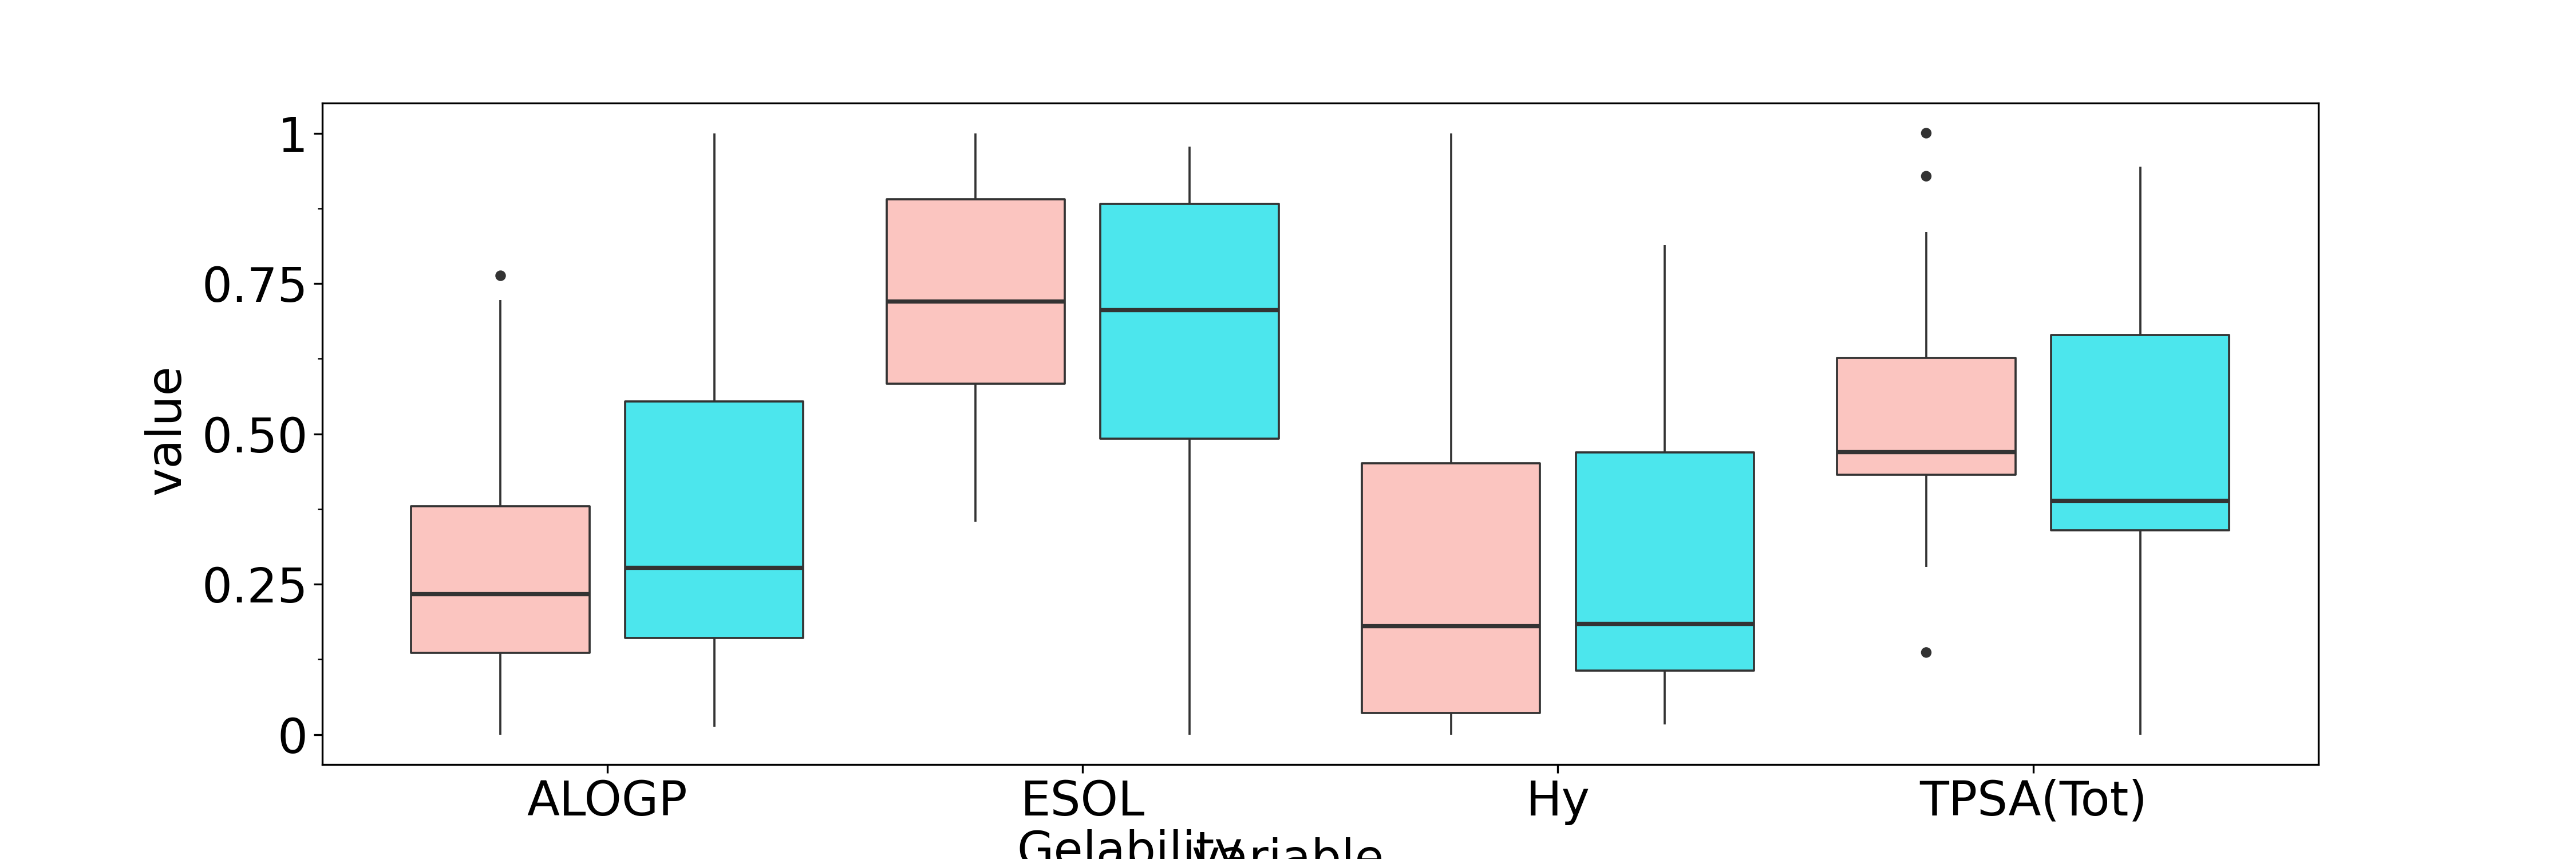

In [258]:
box2_plot=(ggplot(df, aes(x = "variable", y = "value"))
+ geom_boxplot(aes(fill="Gelability"),position = position_dodge(0.9),size=0.5) 
+ guides(fill=guide_legend(title="Gelability"))
+scale_fill_hue(s = 0.9, l = 0.85, h=0.05,color_space='husl')
+theme_matplotlib()
+theme(legend_position="bottom",
       text=element_text(size=20,colour = "black"),
       dpi=300,
       figure_size=(15,5)))
print(box2_plot)
box2_plot.save("./original figure/Figure_3A.svg", units="in", dpi=300)

In [255]:
#Scale data
Scaler = preprocessing.MinMaxScaler() #StandardScaler
Transformer =Scaler.fit(Scaler_data)
X_scaled_data=Transformer.transform(Scaler_data)
X_scaled_data =pd.DataFrame(X_scaled_data)
X_scaled_data.columns=Scaler_data.columns


,Gelability,variable,value
0,1.0,MLOGP,0.209850
1,1.0,MLOGP,0.000000
2,1.0,MLOGP,0.068931
3,1.0,MLOGP,0.131272
4,1.0,MLOGP,0.335319


In [230]:
Gel_data=Raw_data.loc[Raw_data["Gelability"] == 1]
Gel_data.head()

,Gelability,Chemdraw_smiles,Canonical_smiles
ID,,,
Ma_2019_A,1,OC[C@@H]1[C@H]([C@H]([C@H](N2C=NC3=C(N=CN=C32)...,Nc1ncnc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O)[C@H]1O
Ma_2019_U,1,O[C@H]1[C@@H](O)[C@H](N(C(N2)=O)C=CC2=O)O[C@@H...,O=c1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O...
Ma_2019_C,1,O[C@H]1[C@@H](O)[C@H](N(C=CC(N)=N2)C2=O)O[C@@H...,Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1
Ma_2019_G,1,O=C1C2=C(N=C(N1)N)N([C@H]3[C@H](O)[C@@H]([C@H]...,Nc1nc2c(ncn2[C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)...
Ma_2019_dA,1,O[C@H]1C[C@H](N(C=N2)C3=C2C(N)=NC=N3)O[C@@H]1CO,Nc1ncnc2c1ncn2[C@H]1C[C@H](O)[C@@H](CO)O1


In [231]:
aDesc.set_input_SMILES(Gel_data['Canonical_smiles'].tolist())
if not aDesc.calculate_descriptors(['ALOGP','MLOGP','LOGP99','LOGPcons','ESOL','Hy','TPSA(NO)','TPSA(Tot)']):
 print('Error:' + aDesc.get_error())
else:
 Gel_descriptors=aDesc.get_output()

In [232]:
Gel_descriptor=pd.DataFrame(Gel_descriptors)
Gel_descriptor.columns=['ALOGP','MLOGP','LOGP99','LOGPcons','ESOL','Hy','TPSA(NO)','TPSA(Tot)']
Gel_descriptor.index=Gel_data.index
Gel_descriptor['Gelability']="Gelable"

In [ ]:
Gel_data=pd.concat([Pubchem_gel_data,Gel_descriptor],axis=0)
Scaler_data=Gel_data.drop(['Gelability'],axis=1)
Scaler_data

In [ ]:
#Scale data
Scaler = preprocessing.MinMaxScaler() #StandardScaler
Transformer =Scaler.fit(Scaler_data)
X_scaled_data=Transformer.transform(Scaler_data)
X_scaled_data =pd.DataFrame(X_scaled_data)
X_scaled_data.columns=Scaler_data.columns
X_scaled_data.index=Scaler_data.index
X_scaled_data['Gelability']=Gel_data['Gelability']
X_scaled_data

,Probability of not gelable,Probability of gelable
cid,,
445132,0.316696,0.683304
92252368,0.319758,0.680242
21826754,0.319758,0.680242
131876227,0.323628,0.676372
293725,0.340278,0.659722
...,...,...
71832128,0.736183,0.263817
42553032,0.736183,0.263817
42553033,0.736183,0.263817


,ALOGP,MLOGP,LOGP99,LOGPcons,ESOL,Hy,TPSA(NO),TPSA(Tot),Gelability
ID,,,,,,,,,
445132,-3.2962,-2.276331,-2.9891,-2.853877,0.285331,3.047842,182.93,192.74,Top 10%
92252368,-2.0988,-1.882651,-2.7198,-2.233750,0.128903,3.244100,157.64,157.64,Top 10%
21826754,-2.0988,-1.882651,-2.7198,-2.233750,0.128903,3.244100,157.64,157.64,Top 10%
131876227,-1.8929,-1.565443,-2.3776,-1.945314,-0.155452,2.245000,146.78,146.78,Top 10%
293725,-1.5960,-0.654957,-1.2234,-1.158119,-0.646246,1.296520,132.51,132.51,Top 10%
...,...,...,...,...,...,...,...,...,...
453467,-1.5273,-0.529896,-1.1234,-1.060198,-0.565902,2.235747,110.34,110.34,Top 10%
10922698,-1.5273,-0.529896,-1.1234,-1.060198,-0.565902,2.235747,110.34,110.34,Top 10%
6573798,-1.5273,-0.529896,-1.1234,-1.060198,-0.565902,2.235747,110.34,110.34,Top 10%


,Gelability,Chemdraw_smiles,Canonical_smiles
ID,,,
Ma_2019_A,1,OC[C@@H]1[C@H]([C@H]([C@H](N2C=NC3=C(N=CN=C32)...,Nc1ncnc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O)[C@H]1O
Ma_2019_U,1,O[C@H]1[C@@H](O)[C@H](N(C(N2)=O)C=CC2=O)O[C@@H...,O=c1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O...
Ma_2019_C,1,O[C@H]1[C@@H](O)[C@H](N(C=CC(N)=N2)C2=O)O[C@@H...,Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1
Ma_2019_G,1,O=C1C2=C(N=C(N1)N)N([C@H]3[C@H](O)[C@@H]([C@H]...,Nc1nc2c(ncn2[C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)...
Ma_2019_dA,1,O[C@H]1C[C@H](N(C=N2)C3=C2C(N)=NC=N3)O[C@@H]1CO,Nc1ncnc2c1ncn2[C@H]1C[C@H](O)[C@@H](CO)O1


,ALOGP,MLOGP,LOGP99,LOGPcons,ESOL,Hy,TPSA(NO),TPSA(Tot)
ID,,,,,,,,
445132,-3.2962,-2.276331,-2.9891,-2.853877,0.285331,3.047842,182.93,192.74
92252368,-2.0988,-1.882651,-2.7198,-2.233750,0.128903,3.244100,157.64,157.64
21826754,-2.0988,-1.882651,-2.7198,-2.233750,0.128903,3.244100,157.64,157.64
131876227,-1.8929,-1.565443,-2.3776,-1.945314,-0.155452,2.245000,146.78,146.78
293725,-1.5960,-0.654957,-1.2234,-1.158119,-0.646246,1.296520,132.51,132.51
...,...,...,...,...,...,...,...,...
Buerkle_2012_8OMeTAcG,-0.7481,1.052887,-1.0948,-0.263338,-1.670243,1.067811,186.95,186.95
Xiao_2018_2,-2.9663,-0.719963,-3.3448,-2.343688,-0.003544,5.958704,177.33,177.33
Xiao_2019_2,-2.2018,-0.805870,-2.7235,-1.910390,-0.403892,3.963857,176.58,176.58


,ALOGP,MLOGP,LOGP99,LOGPcons,ESOL,Hy,TPSA(NO),TPSA(Tot),Gelability
ID,,,,,,,,,
445132,0.120976,0.123701,0.164664,0.110432,0.855673,0.449902,0.707218,0.725518,Top 10%
92252368,0.248267,0.183944,0.197255,0.189625,0.825067,0.477743,0.535340,0.501880,Top 10%
21826754,0.248267,0.183944,0.197255,0.189625,0.825067,0.477743,0.535340,0.501880,Top 10%
131876227,0.270156,0.232484,0.238669,0.226459,0.769432,0.336013,0.461533,0.432686,Top 10%
293725,0.301718,0.371810,0.378354,0.326987,0.673406,0.201464,0.364551,0.341765,Top 10%
...,...,...,...,...,...,...,...,...,...
Buerkle_2012_8OMeTAcG,0.391855,0.633151,0.393917,0.441253,0.473056,0.169019,0.734539,0.688627,Gelable
Xiao_2018_2,0.156047,0.361863,0.121616,0.175585,0.799154,0.862830,0.669159,0.627334,Gelable
Xiao_2019_2,0.237318,0.348717,0.196807,0.230919,0.720824,0.579846,0.664061,0.622555,Gelable


In [186]:
df=pd.melt(X_scaled_data,id_vars=['Gelability'])
df.head()

,Gelability,variable,value
0,Top 10%,ALOGP,0.120976
1,Top 10%,ALOGP,0.248267
2,Top 10%,ALOGP,0.248267
3,Top 10%,ALOGP,0.270156
4,Top 10%,ALOGP,0.301718


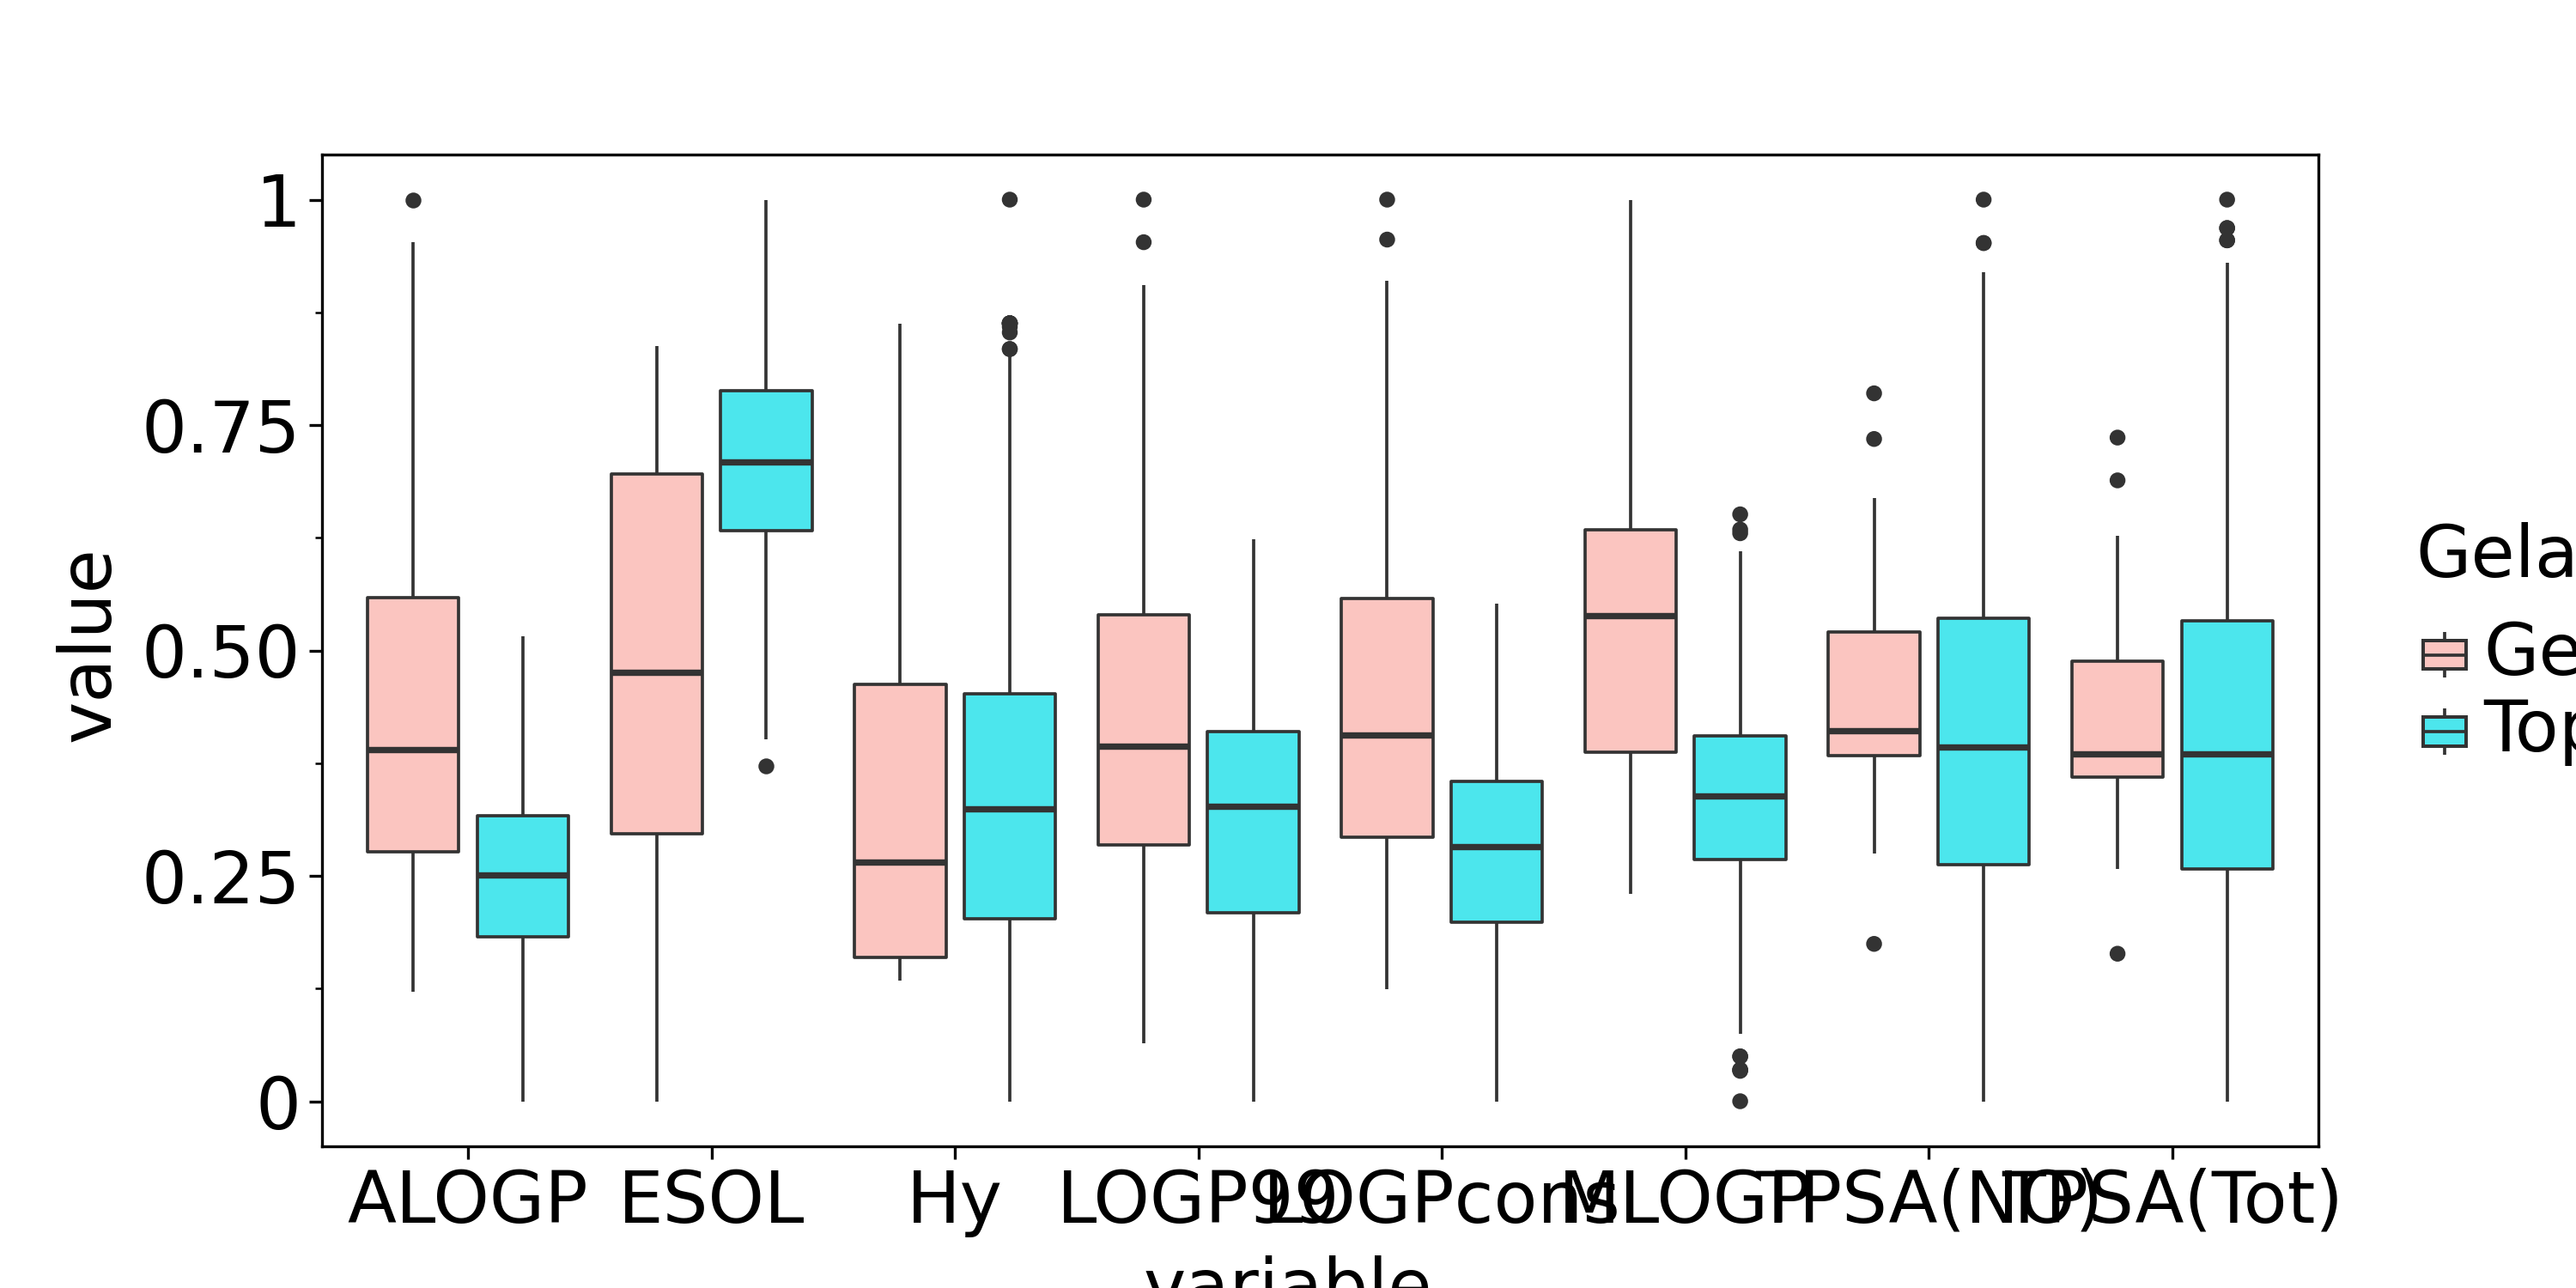

In [215]:
box2_plot=(ggplot(df, aes(x = "variable", y = "value"))
+ geom_boxplot(aes(fill="Gelability"),position = position_dodge(0.9),size=0.5) 
+ guides(fill=guide_legend(title="Gelability"))
+scale_fill_hue(s = 0.9, l = 0.85, h=0.05,color_space='husl')
+theme_matplotlib()
+theme(legend_position='right',
       text=element_text(size=20,colour = "black"),
       dpi=300,
       figure_size=(10,5)))
print(box2_plot)
box2_plot.save("./original figure/Figure_3A.svg", units="in", dpi=300)

In [216]:
result=pd.read_csv("./Results/LR_predict_data.csv",sep=',')
result=pd.DataFrame(result)
result=result.sort_values(by=['Probability of gelable'],ascending=True)
result["rank"]=list(range(1,len(result)+1))
result

,cid,Probability of not gelable,Probability of gelable,rank
7256,84015621,0.764249,0.235751,1
7255,1838,0.759125,0.240875,2
7254,42553033,0.736183,0.263817,3
7253,42553032,0.736183,0.263817,4
7252,71832128,0.736183,0.263817,5
...,...,...,...,...
4,293725,0.340278,0.659722,7253
3,131876227,0.323628,0.676372,7254
2,21826754,0.319758,0.680242,7255
1,92252368,0.319758,0.680242,7256


In [217]:
resultX1=result.loc[result["cid"] ==135518164]
resultX2=result.loc[result["cid"] ==135763231]
resultX3=result.loc[result["cid"] ==135407175]

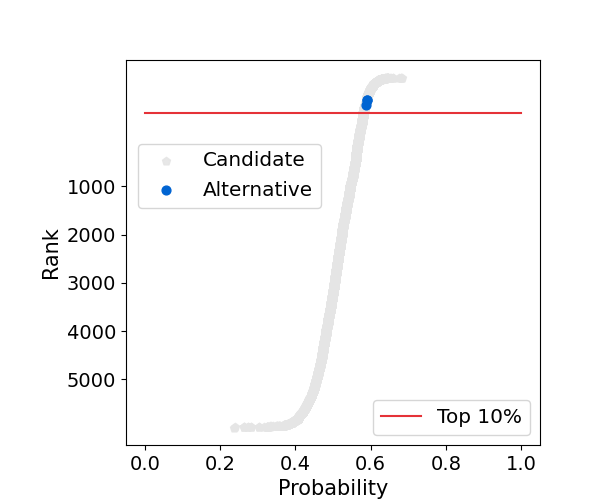

In [225]:
%matplotlib ipympl
plt.rcParams['figure.figsize'] = (6, 5) 
fig = plt.figure(1)

x = [0,1]
y = [len(result)*0.90,len(result)*0.90]
P=plt.plot(x,y,color='#e53238')
P1=plt.scatter(result['Probability of gelable'], result['rank'],  alpha=0.9, marker='p', color='#e5e5e5')
P2=plt.scatter(resultX1['Probability of gelable'],resultX1['rank'] ,  alpha=1, marker='o', color='#0064d2',s=40)
P3=plt.scatter(resultX2['Probability of gelable'],resultX2['rank'] ,  alpha=1, marker='o', color='#0064d2',s=40)
P4=plt.scatter(resultX3['Probability of gelable'],resultX3['rank'] ,  alpha=1, marker='o', color='#0064d2',s=40)
plt.xlabel('Probability',fontsize = 15)
yData = [1000, 2000, 3000,4000,5000]
yLim= ["5000","4000","3000","2000","1000"]
plt.yticks(yData,yLim)
plt.ylabel('Rank',fontsize = 15)
plt.tick_params(labelsize=14) 
l1=plt.legend(P, ['Top 10%'], loc="lower right",scatterpoints=1,fontsize='large')
l2=plt.legend([P1,P2], ['Candidate', 'Alternative'],bbox_to_anchor=(0.25,0.7),loc=10,scatterpoints=1,fontsize='large')

plt.gca().add_artist(l1)
plt.gcf().subplots_adjust(left=0.21)
plt.savefig("./original figure/Figure_3B.svg", dpi=600,format="svg")
plt.show()